<a href="https://colab.research.google.com/github/mohammadAliMkh/Pytorch/blob/main/fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import torch

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision import models
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [39]:
mnist_train = datasets.FashionMNIST(root = "Data" , train = True ,download = True , transform = ToTensor() , target_transform = None)
mnist_test = datasets.FashionMNIST(root = "Data" , train = False ,download = True , transform = ToTensor() , target_transform = None)

In [40]:
len(mnist_train) , len(mnist_test)

(60000, 10000)

In [41]:
class_labels = mnist_train.classes

In [42]:
mnist_train.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

(-0.5, 27.5, 27.5, -0.5)

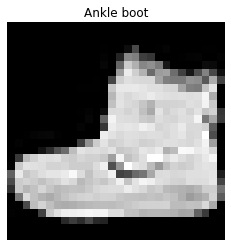

In [43]:
plt.imshow(mnist_train.data[0] , cmap = "gray")
plt.title(class_labels[mnist_train.targets[0]])
plt.axis(False)

In [44]:
def plot_random_images(number_of_images = 16 , data = mnist_train):
  ''' plot random images of selected datasets with their labels
  '''
  plt.figure(figsize = (12 , 8))
  for i in range(1 , number_of_images + 1):
    plt.subplot(4 , 4 , i)
    rand = torch.randint(0, len(mnist_train), size =[1]).item()
    img , label = mnist_train[rand]
    plt.imshow(torch.squeeze(img), cmap = "gray")
    plt.title(class_labels[label])
    plt.axis(False)

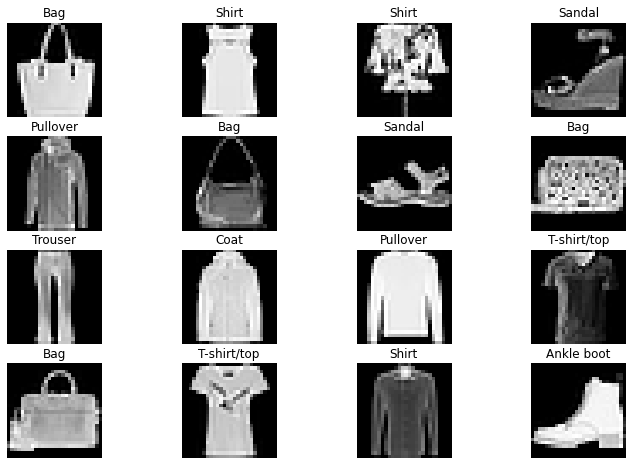

In [45]:
plot_random_images()

In [46]:
train_dataLoader = DataLoader(dataset = mnist_train , batch_size = 32 , shuffle = True)
train_dataLoader

In [47]:
test_dataLoader = DataLoader(dataset = mnist_test , batch_size = 32 , shuffle = False)
test_dataLoader

In [48]:
def plot_first_batch(dataLoader, batch_size = 32):
  img , label = next(iter(dataLoader))
  plt.figure(figsize = (20 ,14))
  for i in range( len(img)):
    plt.subplot(4,8 , i+1)
    plt.imshow(img[i].squeeze() , cmap = "gray")
    plt.title(class_labels[label[i]])
    plt.axis(False)

In [49]:
class FashionMnistModel0(torch.nn.Module):
  def __init__(self , input_layer:int , hidden_layer:int , output_layer:int):
    super().__init__()
    self.layerStacks = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(in_features = input_layer , out_features = hidden_layer),
        torch.nn.Linear(in_features = hidden_layer , out_features = output_layer)
    )
  
  def forward(self , x:torch.Tensor) -> torch.Tensor:
    return self.layerStacks(x)

In [50]:
model0 = FashionMnistModel0(input_layer = 28 * 28 , hidden_layer = 128 , output_layer = len(class_labels))

In [51]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model0.parameters() , lr = 0.01)

In [52]:
from tqdm.auto import tqdm
import timeit

In [53]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [54]:
def calclulate_timer(start_time , end_time , device = device):
  ''' this method's been created for calculating process time on the selcted device
  args:
     start_time: timeit.Timer().timer() before operation
     end_time: timeit.Timer().timer() after operation
  output:
     print end_time - start_time 
  '''
  start = start_time
  end = end_time
  time = end - start
  print(f"process time on the {device} is\t{time:0.3f}s")

In [55]:
len(train_dataLoader)

1875

In [57]:
#training-part
epochs = 5
start = timeit.Timer().timer()

for step in range(epochs):
  train_loss = 0

  for batch , (data , label) in enumerate(train_dataLoader):
    #train
    model0.train()

    #pass data
    train_preds = model0(data)

    #calculate loss
    loss = loss_fn(train_preds , label)
    train_loss = train_loss + loss

    #optimizer zero grad
    optimizer.zero_grad()

    #loss backward
    loss.backward()

    #optimizer step
    optimizer.step()
    if (batch + 1) % 400 == 0:
      print(f"number of data passed\t{(batch + 1) * len(data)}")
    
  
  train_loss = train_loss / len(train_dataLoader)

  model0.eval()
  with torch.inference_mode():
    test_loss = 0
    for data , label in test_dataLoader:
      test_preds = model0(data)
      loss = loss_fn(test_preds , label)
      test_loss = test_loss + loss
    test_loss = test_loss / len(test_dataLoader)
  
  print(f"train loss is {train_loss}\t test loss is {test_loss}")
end = timeit.Timer().timer()
calclulate_timer(start_time = start , end_time = end , device = "cuda" if torch.cuda.is_available() else "cpu")

number of data passed	12800
number of data passed	25600
number of data passed	38400
number of data passed	51200
train loss is 0.4948565661907196	 test loss is 0.5055441856384277
number of data passed	12800
number of data passed	25600
number of data passed	38400
number of data passed	51200
train loss is 0.4695974886417389	 test loss is 0.49010738730430603
number of data passed	12800
number of data passed	25600
number of data passed	38400
number of data passed	51200
train loss is 0.4541189670562744	 test loss is 0.4876577854156494
number of data passed	12800
number of data passed	25600
number of data passed	38400
number of data passed	51200
train loss is 0.4431063234806061	 test loss is 0.47717347741127014
number of data passed	12800
number of data passed	25600
number of data passed	38400
number of data passed	51200
train loss is 0.43477150797843933	 test loss is 0.46735402941703796
process time on the cuda is	35.411s
